# 1. IMPORTACIÓN DE LIBRERÍAS

Importamos las librerias necesarias para comenzar a trabajar con los datos

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install xgboost

In [16]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install tensorflow

In [18]:
import joblib
from sklearn import tree
from sklearn.tree import export_text
from xgboost import XGBClassifier
from subprocess import check_call
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import auc, roc_auc_score, roc_curve, accuracy_score, confusion_matrix
from sklearn import tree
from sklearn.tree import export_text
from xgboost import XGBClassifier
from subprocess import check_call
from IPython.display import Image as PImage

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras import metrics

# 2. IMPORTACIÓN DE LOS SETS DE DATOS

Importamos la compilación de sets de datos a utilizar y vemos sus primeros registros

In [ ]:
import pandas as pd

# Especifica la ruta del archivo CSV
file_path = 'D:/Tesis/Definitivos/nuevo/df_mora_prestamos2.csv'

# Cargar el CSV en un DataFrame
df_mora_prestamos = pd.read_csv(file_path)

# Mostrar las primeras filas del DataFrame para verificar la carga
print(df_mora_prestamos.head())

In [108]:
import pandas as pd

# Supongamos que df_mora_prestamos es tu DataFrame
# Si no has cargado el DataFrame, puedes hacerlo de la siguiente manera:
# df_mora_prestamos = pd.read_csv('tu_archivo.csv')

# Contar la cantidad de registros y variables
num_registros = df_mora_prestamos.shape[0]  # Número de filas
num_variables = df_mora_prestamos.shape[1]  # Número de columnas

# Imprimir los resultados
print(f"Cantidad de registros: {num_registros}")
print(f"Cantidad de variables: {num_variables}")

Cantidad de registros: 1622022
Cantidad de variables: 35


# REDES NEURONALES - TECNICAS DE BALANCEO DE DATOS

C:\Users\enfel\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15207/15207 ━━━━━━━━━━━━━━━━━━━━ 10s 685us/step

Medidas de rendimiento para Sin Balanceo:
ROC-AUC: 0.9988
Precision: 0.9778
Recall: 0.9641
F1-Score: 0.9709
Accuracy: 0.9967

Reporte de Clasificación:
              precision  recall  f1-score      support
0                0.9978  0.9987    0.9983  458900.0000
1                0.9778  0.9641    0.9709   27707.0000
accuracy         0.9967  0.9967    0.9967       0.9967
macro avg        0.9878  0.9814    0.9846  486607.0000
weighted avg     0.9967  0.9967    0.9967  486607.0000


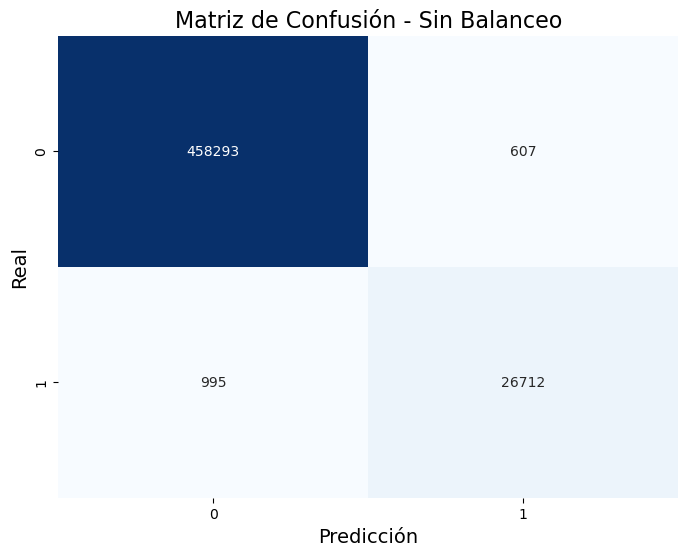

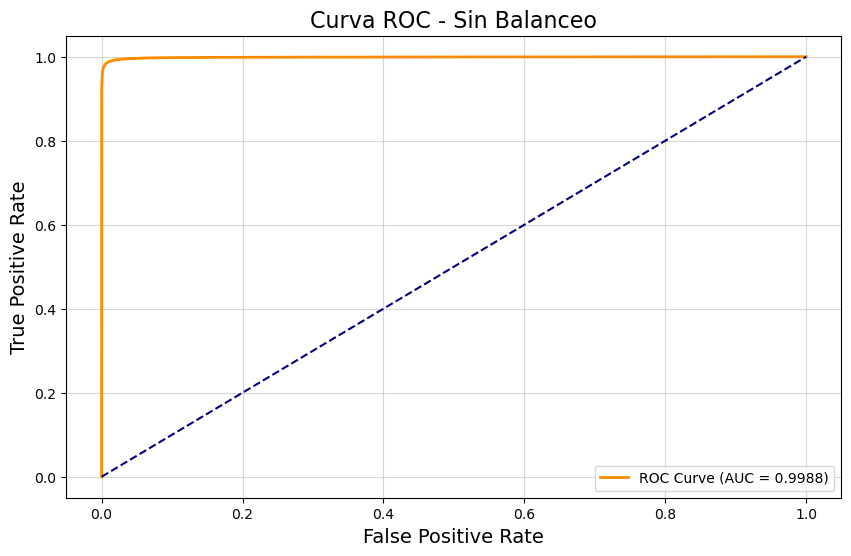

C:\Users\enfel\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15207/15207 ━━━━━━━━━━━━━━━━━━━━ 10s 654us/step

Medidas de rendimiento para SMOTE:
ROC-AUC: 0.9993
Precision: 0.9117
Recall: 0.9857
F1-Score: 0.9472
Accuracy: 0.9937

Reporte de Clasificación:
              precision  recall  f1-score      support
0                0.9991  0.9942    0.9967  458900.0000
1                0.9117  0.9857    0.9472   27707.0000
accuracy         0.9937  0.9937    0.9937       0.9937
macro avg        0.9554  0.9900    0.9720  486607.0000
weighted avg     0.9942  0.9937    0.9939  486607.0000


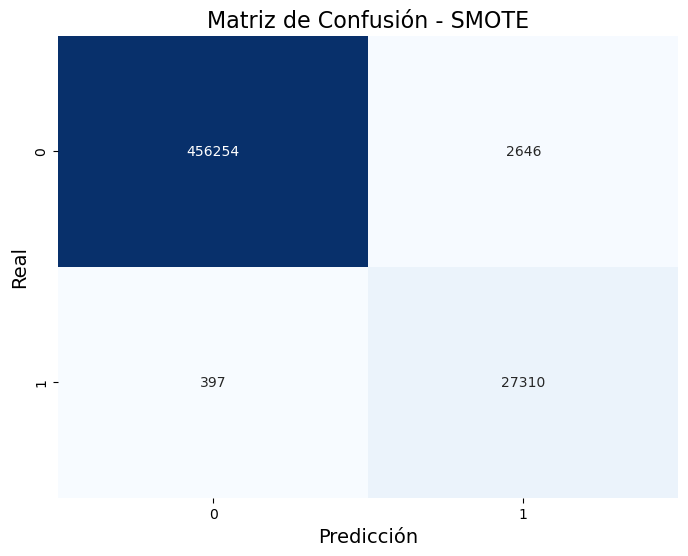

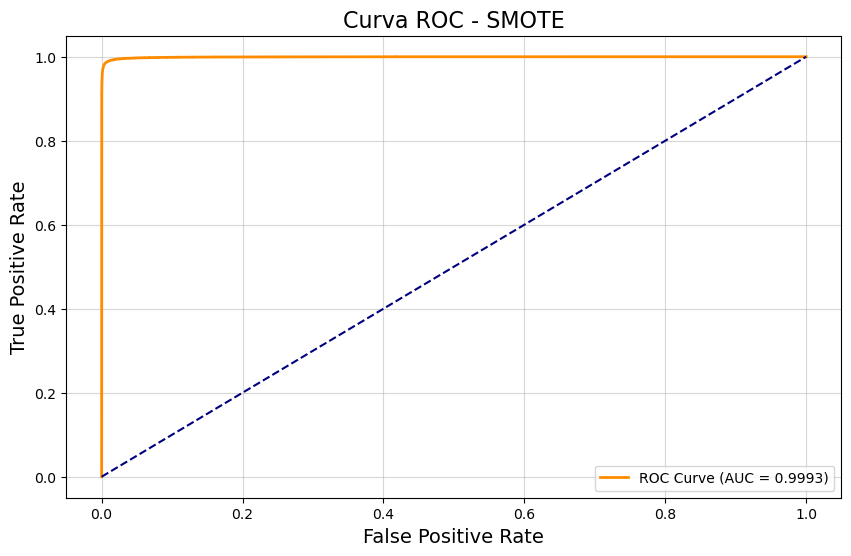

C:\Users\enfel\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15207/15207 ━━━━━━━━━━━━━━━━━━━━ 10s 661us/step

Medidas de rendimiento para SMOTE-Tomek:
ROC-AUC: 0.9992
Precision: 0.8942
Recall: 0.9847
F1-Score: 0.9373
Accuracy: 0.9925

Reporte de Clasificación:
              precision  recall  f1-score      support
0                0.9991  0.9930    0.9960  458900.0000
1                0.8942  0.9847    0.9373   27707.0000
accuracy         0.9925  0.9925    0.9925       0.9925
macro avg        0.9466  0.9888    0.9666  486607.0000
weighted avg     0.9931  0.9925    0.9927  486607.0000


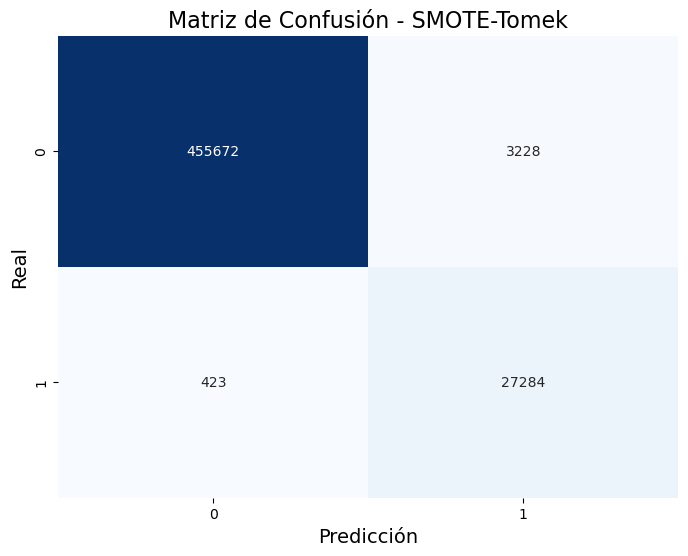

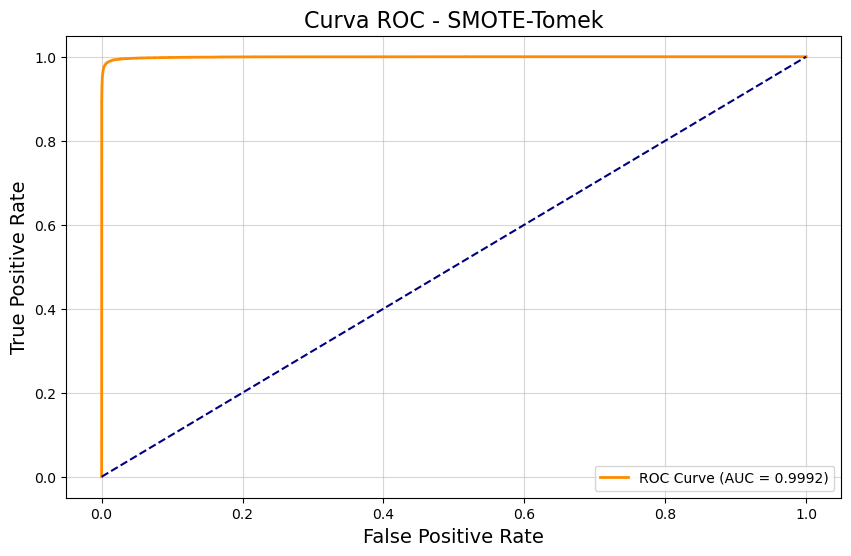


Comparativa de Técnicas de Balanceo:
               roc_auc  precision    recall        f1  accuracy
Sin Balanceo  0.998760   0.977781  0.964088  0.970886  0.996708
SMOTE         0.999276   0.911670  0.985671  0.947228  0.993746
SMOTE-Tomek   0.999213   0.894206  0.984733  0.937289  0.992497


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    roc_curve, 
    auc,
    f1_score, 
    accuracy_score, 
    precision_score, 
    recall_score
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

# Configuraciones de semilla para reproducibilidad
np.random.seed(42)

# Cargar dataset
df_mora_prestamos = pd.read_csv('C:/Tesis/Datos/df_mora_prestamos2.csv')

# Separar características y variable objetivo
X = df_mora_prestamos.drop('Morosidad', axis=1)
y = df_mora_prestamos['Morosidad']

# Dividir el conjunto de datos (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Escalar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Función para crear modelo de Red Neuronal
def crear_modelo(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_shape,), kernel_initializer='he_normal'),
        Dropout(0.3),
        Dense(32, activation='relu', kernel_initializer='he_normal'),
        Dropout(0.2),
        Dense(16, activation='relu', kernel_initializer='he_normal'),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Función para entrenar, predecir y evaluar modelo
def evaluar_modelo(X_train_balanceado, y_train_balanceado, X_test, y_test, nombre_tecnica):
    # Preparar los datos
    input_shape = X_train_balanceado.shape[1]
    
    # Crear modelo
    model = crear_modelo(input_shape)
    
    # Callbacks
    early_stopping = EarlyStopping(
        monitor='val_loss', 
        patience=10, 
        restore_best_weights=True
    )
    
    # Entrenar
    historia = model.fit(
        X_train_balanceado, 
        y_train_balanceado, 
        epochs=100, 
        batch_size=32, 
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=0
    )
    
    # Predicciones
    y_pred_proba = model.predict(X_test).ravel()
    y_pred = (y_pred_proba > 0.5).astype(int)
    
    # Calcular métricas
    roc_auc = auc(*roc_curve(y_test, y_pred_proba)[:2])
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"\nMedidas de rendimiento para {nombre_tecnica}:")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    
    # Reporte de Clasificación
    print("\nReporte de Clasificación:")
    reporte = classification_report(y_test, y_pred, output_dict=True)
    reporte_redondeado = pd.DataFrame(reporte).transpose().round(4)
    print(reporte_redondeado)
    
    # Matriz de Confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Matriz de Confusión - {nombre_tecnica}", fontsize=16)
    plt.xlabel("Predicción", fontsize=14)
    plt.ylabel("Real", fontsize=14)
    plt.show()
    
    # Curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})", color="darkorange", lw=2)
    plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
    plt.xlabel("False Positive Rate", fontsize=14)
    plt.ylabel("True Positive Rate", fontsize=14)
    plt.title(f"Curva ROC - {nombre_tecnica}", fontsize=16)
    plt.legend(loc="lower right")
    plt.grid(alpha=0.5)
    plt.show()
    
    return {
        'roc_auc': roc_auc,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'accuracy': accuracy
    }

# 1. Sin balanceo
resultados_sin_balanceo = evaluar_modelo(
    X_train_scaled, y_train, X_test_scaled, y_test, 'Sin Balanceo'
)

# 2. Con SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)
resultados_smote = evaluar_modelo(
    X_train_smote, y_train_smote, X_test_scaled, y_test, 'SMOTE'
)

# 3. Con SMOTE-Tomek
smote_tomek = SMOTETomek(random_state=42)
X_train_smote_tomek, y_train_smote_tomek = smote_tomek.fit_resample(X_train_scaled, y_train)
resultados_smote_tomek = evaluar_modelo(
    X_train_smote_tomek, y_train_smote_tomek, X_test_scaled, y_test, 'SMOTE-Tomek'
)

# Comparativa de resultados
comparativa = pd.DataFrame([
    resultados_sin_balanceo,
    resultados_smote,
    resultados_smote_tomek
], index=['Sin Balanceo', 'SMOTE', 'SMOTE-Tomek'])
print("\nComparativa de Técnicas de Balanceo:")
print(comparativa)

In [5]:
!pip install scikeras

### MEJORES HIPERPARAMETROS

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
from scikeras.wrappers import KerasClassifier

# Cargar dataset
df_mora_prestamos = pd.read_csv('C:/Tesis/Datos/df_mora_prestamos2.csv')

# Separar características y variable objetivo
X = df_mora_prestamos.drop('Morosidad', axis=1)
y = df_mora_prestamos['Morosidad']

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Escalar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lista para almacenar resultados
results = []

# Configuraciones a probar
configs = [
    {'neurons': [128, 64, 32], 'dropout': 0.2, 'lr': 0.001, 'batch_size': 32},
    {'neurons': [64, 32, 16], 'dropout': 0.1, 'lr': 0.01, 'batch_size': 64},
    {'neurons': [32, 16, 8], 'dropout': 0.3, 'lr': 0.001, 'batch_size': 16},
    {'neurons': [256, 128, 64], 'dropout': 0.2, 'lr': 0.01, 'batch_size': 32},
    {'neurons': [128, 64, 16], 'dropout': 0.1, 'lr': 0.001, 'batch_size': 64}
]

print("Iniciando búsqueda de hiperparámetros...")

for idx, config in enumerate(configs, 1):
    print(f"\nProbando configuración {idx}/{len(configs)}")
    
    # Crear modelo
    model = Sequential([
        Dense(config['neurons'][0], activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(config['dropout']),
        Dense(config['neurons'][1], activation='relu'),
        Dropout(config['dropout']),
        Dense(config['neurons'][2], activation='relu'),
        Dropout(config['dropout']),
        Dense(1, activation='sigmoid')
    ])
    
    # Compilar modelo
    model.compile(
        optimizer=Adam(learning_rate=config['lr']),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    # Entrenar modelo
    history = model.fit(
        X_train_scaled, y_train,
        epochs=100,
        batch_size=config['batch_size'],
        validation_split=0.2,
        verbose=0
    )
    
    # Evaluar modelo
    y_pred_proba = model.predict(X_test_scaled, verbose=0)
    y_pred = (y_pred_proba > 0.5).astype(int)
    
    # Calcular métricas
    metrics = {
        'config_id': idx,
        'neurons': str(config['neurons']),
        'dropout': config['dropout'],
        'learning_rate': config['lr'],
        'batch_size': config['batch_size'],
        'roc_auc': roc_auc_score(y_test, y_pred_proba),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'accuracy': accuracy_score(y_test, y_pred)
    }
    
    results.append(metrics)
    
    print(f"Configuración {idx}:")
    print(f"ROC-AUC: {metrics['roc_auc']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1-Score: {metrics['f1']:.4f}")
    print(f"Accuracy: {metrics['accuracy']:.4f}")

# Convertir resultados a DataFrame y guardar
results_df = pd.DataFrame(results)
print("\nResumen de todas las configuraciones:")
print(results_df)
results_df.to_csv('C:/Tesis/Datos/resultados_nn_optimizacion.csv', index=False)

# Encontrar la mejor configuración
best_config = results_df.loc[results_df['roc_auc'].idxmax()]
print("\nMejor configuración encontrada:")
print(f"Neuronas por capa: {best_config['neurons']}")
print(f"Dropout: {best_config['dropout']}")
print(f"Learning rate: {best_config['learning_rate']}")
print(f"Batch size: {best_config['batch_size']}")
print(f"ROC-AUC: {best_config['roc_auc']:.4f}")

Iniciando búsqueda de hiperparámetros...

Probando configuración 1/5


C:\Users\enfel\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Configuración 1:
ROC-AUC: 0.9990
Precision: 0.9853
Recall: 0.9591
F1-Score: 0.9720
Accuracy: 0.9969

Probando configuración 2/5


C:\Users\enfel\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Configuración 2:
ROC-AUC: 0.9925
Precision: 0.9870
Recall: 0.9314
F1-Score: 0.9584
Accuracy: 0.9954

Probando configuración 3/5


C:\Users\enfel\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Configuración 3:
ROC-AUC: 0.9955
Precision: 0.9800
Recall: 0.9550
F1-Score: 0.9673
Accuracy: 0.9963

Probando configuración 4/5


C:\Users\enfel\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Configuración 4:
ROC-AUC: 0.9721
Precision: 0.9475
Recall: 0.9248
F1-Score: 0.9360
Accuracy: 0.9928

Probando configuración 5/5


C:\Users\enfel\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Configuración 5:
ROC-AUC: 0.9989
Precision: 0.9857
Recall: 0.9683
F1-Score: 0.9769
Accuracy: 0.9974

Resumen de todas las configuraciones:
   config_id         neurons  dropout  learning_rate  batch_size   roc_auc  \
0          1   [128, 64, 32]      0.2          0.001          32  0.998962   
1          2    [64, 32, 16]      0.1          0.010          64  0.992514   
2          3     [32, 16, 8]      0.3          0.001          16  0.995452   
3          4  [256, 128, 64]      0.2          0.010          32  0.972150   
4          5   [128, 64, 16]      0.1          0.001          64  0.998933   

   precision    recall        f1  accuracy  
0   0.985316  0.959072  0.972017  0.996856  
1   0.987033  0.931353  0.958385  0.995395  
2   0.979964  0.954993  0.967317  0.996326  
3   0.947456  0.924784  0.935983  0.992797  
4   0.985744  0.968311  0.976950  0.997398  

Mejor configuración encontrada:
Neuronas por capa: [128, 64, 32]
Dropout: 0.2
Learning rate: 0.001
Batch size: 32
ROC-AUC

### REDES NEURONALES - CROSS VALIDATION

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Cargar dataset
df_mora_prestamos = pd.read_csv('C:/Tesis/Datos/df_mora_prestamos2.csv')

# Separar características y variable objetivo
X = df_mora_prestamos.drop('Morosidad', axis=1)
y = df_mora_prestamos['Morosidad']

# Mejores hiperparámetros encontrados
neurons = [128, 64, 32]
dropout_rate = 0.2
learning_rate = 0.001
batch_size = 32

# Función para crear el modelo
def create_model(input_dim):
    model = Sequential([
        Dense(neurons[0], activation='relu', input_dim=input_dim),
        Dropout(dropout_rate),
        Dense(neurons[1], activation='relu'),
        Dropout(dropout_rate),
        Dense(neurons[2], activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Preparar KFold
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Listas para almacenar resultados
train_scores = []
val_scores = []
fold_metrics = []

# Realizar validación cruzada
print(f"Iniciando validación cruzada con {n_splits} folds...")
for fold, (train_idx, val_idx) in enumerate(kf.split(X), 1):
    print(f"\nFold {fold}/{n_splits}")
    
    # Dividir datos
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    # Escalar características
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    # Crear y entrenar modelo
    model = create_model(X.shape[1])
    history = model.fit(
        X_train_scaled, y_train,
        validation_data=(X_val_scaled, y_val),
        epochs=100,
        batch_size=batch_size,
        verbose=0
    )
    
    # Evaluar modelo
    train_pred_proba = model.predict(X_train_scaled, verbose=0)
    val_pred_proba = model.predict(X_val_scaled, verbose=0)
    
    train_pred = (train_pred_proba > 0.5).astype(int)
    val_pred = (val_pred_proba > 0.5).astype(int)
    
    # Calcular métricas
    train_metrics = {
        'roc_auc': roc_auc_score(y_train, train_pred_proba),
        'precision': precision_score(y_train, train_pred),
        'recall': recall_score(y_train, train_pred),
        'f1': f1_score(y_train, train_pred),
        'accuracy': accuracy_score(y_train, train_pred)
    }
    
    val_metrics = {
        'roc_auc': roc_auc_score(y_val, val_pred_proba),
        'precision': precision_score(y_val, val_pred),
        'recall': recall_score(y_val, val_pred),
        'f1': f1_score(y_val, val_pred),
        'accuracy': accuracy_score(y_val, val_pred)
    }
    
    train_scores.append(train_metrics)
    val_scores.append(val_metrics)
    
    print(f"\nMétricas de entrenamiento:")
    for metric, value in train_metrics.items():
        print(f"{metric}: {value:.4f}")
    
    print(f"\nMétricas de validación:")
    for metric, value in val_metrics.items():
        print(f"{metric}: {value:.4f}")

# Calcular promedios y desviaciones estándar
train_means = pd.DataFrame(train_scores).mean()
train_stds = pd.DataFrame(train_scores).std()
val_means = pd.DataFrame(val_scores).mean()
val_stds = pd.DataFrame(val_scores).std()

print("\nResumen de validación cruzada:")
print("\nPromedios en entrenamiento:")
for metric in train_means.index:
    print(f"{metric}: {train_means[metric]:.4f} ± {train_stds[metric]:.4f}")

print("\nPromedios en validación:")
for metric in val_means.index:
    print(f"{metric}: {val_means[metric]:.4f} ± {val_stds[metric]:.4f}")

# Evaluar diferencia entre entrenamiento y validación
print("\nDiferencia entre entrenamiento y validación:")
for metric in train_means.index:
    diff = train_means[metric] - val_means[metric]
    print(f"{metric}: {abs(diff):.4f}")

Iniciando validación cruzada con 5 folds...

Fold 1/5

Métricas de entrenamiento:
roc_auc: 0.9995
precision: 0.9864
recall: 0.9658
f1: 0.9760
accuracy: 0.9973

Métricas de validación:
roc_auc: 0.9991
precision: 0.9833
recall: 0.9623
f1: 0.9727
accuracy: 0.9969

Fold 2/5

Métricas de entrenamiento:
roc_auc: 0.9996
precision: 0.9910
recall: 0.9595
f1: 0.9750
accuracy: 0.9972

Métricas de validación:
roc_auc: 0.9991
precision: 0.9903
recall: 0.9585
f1: 0.9741
accuracy: 0.9971

Fold 3/5

Métricas de entrenamiento:
roc_auc: 0.9995
precision: 0.9923
recall: 0.9530
f1: 0.9723
accuracy: 0.9969

Métricas de validación:
roc_auc: 0.9991
precision: 0.9904
recall: 0.9487
f1: 0.9691
accuracy: 0.9966

Fold 4/5

Métricas de entrenamiento:
roc_auc: 0.9995
precision: 0.9889
recall: 0.9632
f1: 0.9759
accuracy: 0.9973

Métricas de validación:
roc_auc: 0.9990
precision: 0.9860
recall: 0.9605
f1: 0.9731
accuracy: 0.9970

Fold 5/5

Métricas de entrenamiento:
roc_auc: 0.9995
precision: 0.9911
recall: 0.9588
f

In [6]:
### REDES NEURONALES - INCORPORACIÓN DE DATOS NUVOS

Cargando datos...

Entrenando modelo...


C:\Users\Usuario\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9831/9831 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step
9831/9831 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step
4226/4226 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
4226/4226 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step

Comparación de Métricas:
     Métrica  Dataset Prueba (Original)  Dataset Real  Desvío
0   Accuracy                     0.9974        0.9782  0.0192
1  Precision                     0.9875        0.9769  0.0106
2     Recall                     0.9635        0.7100  0.2535
3   F1-Score                     0.9754        0.8224  0.1530
4    ROC-AUC                     0.9994        0.9706  0.0288


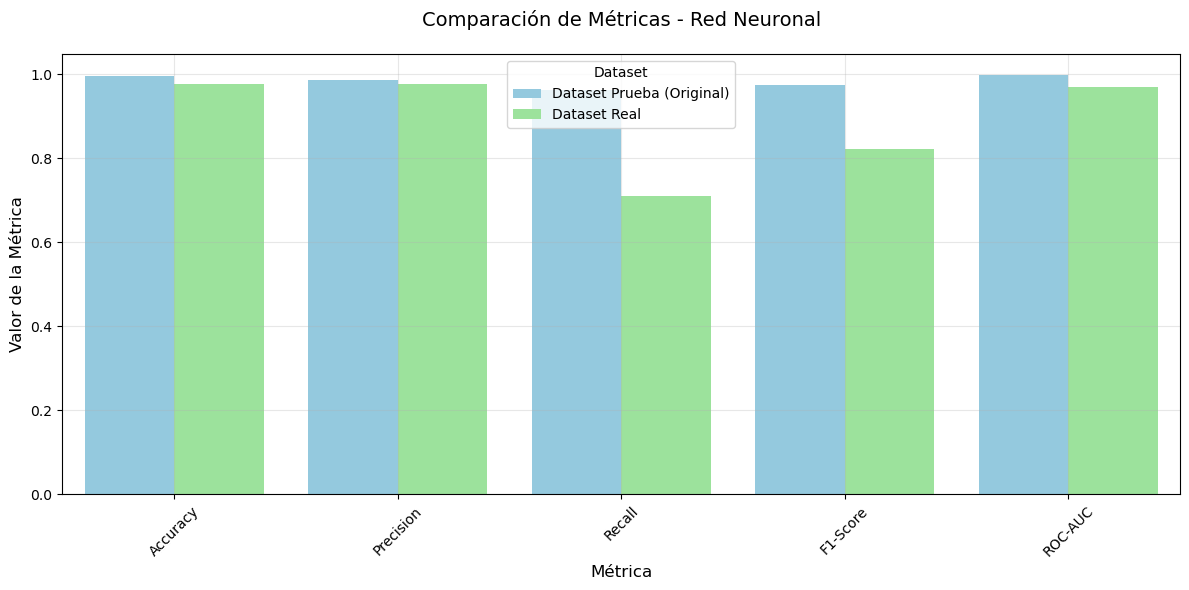

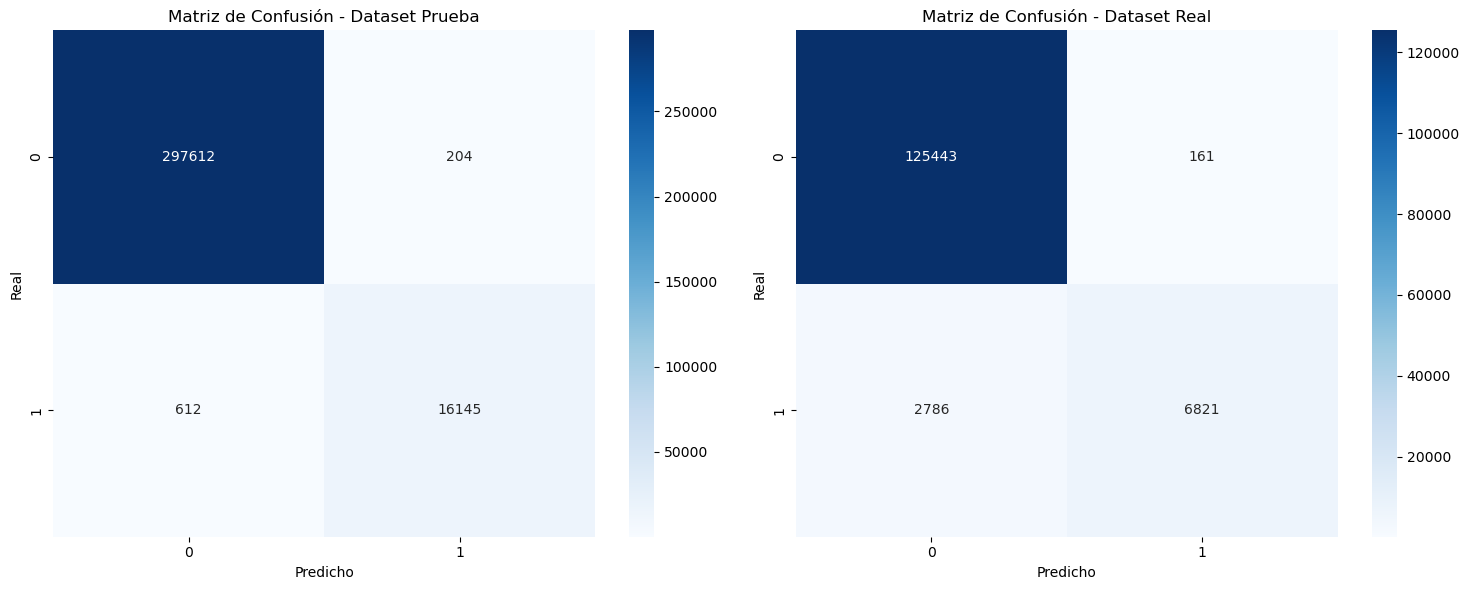


Resultados guardados en:
- comparacion_metricas_nn.png
- matrices_confusion_nn.png
- resultados_red_neuronal.csv


In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    accuracy_score,
    confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns

def create_model(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

def calcular_metricas(y_true, y_pred, y_pred_proba):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-Score': f1_score(y_true, y_pred),
        'ROC-AUC': roc_auc_score(y_true, y_pred_proba)
    }

# Cargar datasets
print("Cargando datos...")
df_mora_prestamos_original = pd.read_csv('D:/Tesis/Definitivos/nuevo/df_mora_prestamos3.csv')
nuevo_dataset = pd.read_csv('D:/Tesis/Definitivos/nuevo/df_mora_prestamos_202401.csv')

# Preparar datos
X_original = df_mora_prestamos_original.drop('Morosidad', axis=1)
y_original = df_mora_prestamos_original['Morosidad']
X_nuevo = nuevo_dataset.drop('Morosidad', axis=1)
y_nuevo = nuevo_dataset['Morosidad']

# División de datos
X_train, X_test, y_train, y_test = train_test_split(
    X_original, y_original, test_size=0.3, stratify=y_original, random_state=42
)

# Escalar datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_nuevo_scaled = scaler.transform(X_nuevo)

# Crear y entrenar modelo
print("\nEntrenando modelo...")
model = create_model(X_train.shape[1])
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    verbose=0
)

# Predicciones
y_test_pred = (model.predict(X_test_scaled) > 0.5).astype(int)
y_test_pred_proba = model.predict(X_test_scaled)

y_nuevo_pred = (model.predict(X_nuevo_scaled) > 0.5).astype(int)
y_nuevo_pred_proba = model.predict(X_nuevo_scaled)

# Calcular métricas
metricas_test = calcular_metricas(y_test, y_test_pred, y_test_pred_proba)
metricas_nuevo = calcular_metricas(y_nuevo, y_nuevo_pred, y_nuevo_pred_proba)

# Crear DataFrame comparativo
comparacion_metricas = pd.DataFrame({
    'Métrica': list(metricas_test.keys()),
    'Dataset Prueba (Original)': list(metricas_test.values()),
    'Dataset Real': list(metricas_nuevo.values()),
    'Desvío': [abs(metricas_test[m] - metricas_nuevo[m]) for m in metricas_test.keys()]
}).round(4)

# Mostrar resultados
print("\nComparación de Métricas:")
print(comparacion_metricas)

# Visualizar comparación
plt.figure(figsize=(12, 6))
sns.barplot(
    data=comparacion_metricas.melt(id_vars='Métrica', 
                                  value_vars=['Dataset Prueba (Original)', 'Dataset Real']),
    x='Métrica', 
    y='value', 
    hue='variable',
    palette=['skyblue', 'lightgreen']
)

plt.title("Comparación de Métricas - Red Neuronal", fontsize=14, pad=20)
plt.ylabel("Valor de la Métrica", fontsize=12)
plt.xlabel("Métrica", fontsize=12)
plt.legend(title="Dataset", title_fontsize=10)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('comparacion_metricas_nn.png')
plt.show()

# Matrices de confusión
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Dataset de prueba
sns.heatmap(confusion_matrix(y_test, y_test_pred), 
            annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title('Matriz de Confusión - Dataset Prueba')
ax1.set_ylabel('Real')
ax1.set_xlabel('Predicho')

# Dataset nuevo
sns.heatmap(confusion_matrix(y_nuevo, y_nuevo_pred), 
            annot=True, fmt='d', cmap='Blues', ax=ax2)
ax2.set_title('Matriz de Confusión - Dataset Real')
ax2.set_ylabel('Real')
ax2.set_xlabel('Predicho')

plt.tight_layout()
plt.savefig('matrices_confusion_nn.png')
plt.show()

# Guardar resultados
comparacion_metricas.to_csv('resultados_red_neuronal.csv', index=False)

# Imprimir resumen
print("\nResultados guardados en:")
print("- comparacion_metricas_nn.png")
print("- matrices_confusion_nn.png")
print("- resultados_red_neuronal.csv")